In [1]:
!pip install folium torch pandas scikit-learn tensorflow keras_tuner

  Using cached folium-0.19.5-py2.py3-none-any.whl (110 kB)
  Using cached torch-2.6.0-cp310-cp310-manylinux1_x86_64.whl (766.7 MB)
  Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)
  Using cached branca-0.8.1-py3-none-any.whl (26 kB)
  Using cached nvidia_nvtx_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (99 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl (211.5 MB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (21.1 MB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl (56.3 MB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl (207.5 MB)
  Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (

In [5]:
import pandas as pd

file_path = "all_data.csv"
df = pd.read_csv(file_path)

In [6]:
# Drop the unneeded columns
df = df.drop(columns=['location', 'track_id', 'listeners', 'genre', 'Capital'])

# Display the updated DataFrame to verify the removal
df.head()

,track_id_number,track_name,artist_name,Country,Latitude,Longitude,MFCC1,MFCC2,MFCC3,MFCC4,...,Tonnetz2,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6,RMS,SpectralRolloff,ZeroCrossingRate,Length,Language
0,1,Saoko,Rosalía,Spain,40.42,-3.75,-87.781052,110.309486,-8.193514,12.189231,...,0.031682,0.031099,0.049473,0.010867,-0.011590,0.226229,4086.001064,0.095356,140.202132,es
1,2,LA FAMA,Rosalía,Spain,40.42,-3.75,-142.864670,129.827835,5.117205,23.859261,...,0.126945,0.053468,0.035345,-0.006220,0.009974,0.271468,2803.446239,0.059665,251.379274,es
2,3,Spanish Caravan,The Doors,United States,38.88,-77.00,-208.096588,98.872444,-13.651766,36.340504,...,-0.067584,0.138996,0.009897,-0.000284,0.004213,0.059760,4195.064707,0.097843,178.306667,en
3,4,MALAMENTE - Cap.1: Augurio,Rosalía,Spain,40.42,-3.75,-144.406586,103.702049,5.672822,21.341652,...,0.103094,0.069495,0.033981,-0.015257,0.012077,0.243367,3184.956769,0.052307,168.085351,es
4,5,Chicken Teriyaki,Rosalía,Spain,40.42,-3.75,-137.848801,85.967781,3.030798,22.190674,...,0.015080,-0.024649,-0.018667,0.015736,-0.007838,0.261582,4304.387237,0.071205,133.886304,es


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
df['Language'] = df['Language'].astype(str)


# Tokenize language column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Language'])

# Convert languages to integer sequences
df['language_encoded'] = tokenizer.texts_to_sequences(df['Language'])

# Since language is a single word, each sequence is a single number
df['language_encoded'] = df['language_encoded'].apply(lambda x: x[0] if x else 0)

# Convert to NumPy array for training
import numpy as np
X_language = np.array(df['language_encoded']).reshape(-1, 1)
df.drop(columns=['Language'], inplace=True)  # Remove the original Language column
df.rename(columns={'language_encoded': 'Language'}, inplace=True)  # Rename encoded column


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
df['Country'] = df['Country'].astype(str)


# Tokenize country column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Country'])

# Convert countries to integer sequences
df['country_encoded'] = tokenizer.texts_to_sequences(df['Country'])

# Since country is a single word, each sequence is a single number
df['country_encoded'] = df['country_encoded'].apply(lambda x: x[0] if x else 0)

# Convert to NumPy array for training
import numpy as np
X_language = np.array(df['country_encoded']).reshape(-1, 1)

In [9]:
import pandas as pd


# Count occurrences of each class
class_counts = df['country_encoded'].value_counts()

# Filter out classes that appear only once
df = df[df['country_encoded'].isin(class_counts[class_counts > 5].index)]

In [32]:
class_counts

country_encoded
1      99
2      84
5      51
6      51
12     50
       ..
265     1
257     1
252     1
297     1
269     1
Name: count, Length: 257, dtype: int64

In [10]:
df

,track_id_number,track_name,artist_name,Country,Latitude,Longitude,MFCC1,MFCC2,MFCC3,MFCC4,...,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6,RMS,SpectralRolloff,ZeroCrossingRate,Length,Language,country_encoded
0,1,Saoko,Rosalía,Spain,40.42,-3.75,-87.781052,110.309486,-8.193514,12.189231,...,0.031099,0.049473,0.010867,-0.011590,0.226229,4086.001064,0.095356,140.202132,2,8
1,2,LA FAMA,Rosalía,Spain,40.42,-3.75,-142.864670,129.827835,5.117205,23.859261,...,0.053468,0.035345,-0.006220,0.009974,0.271468,2803.446239,0.059665,251.379274,2,8
2,3,Spanish Caravan,The Doors,United States,38.88,-77.00,-208.096588,98.872444,-13.651766,36.340504,...,0.138996,0.009897,-0.000284,0.004213,0.059760,4195.064707,0.097843,178.306667,1,1
3,4,MALAMENTE - Cap.1: Augurio,Rosalía,Spain,40.42,-3.75,-144.406586,103.702049,5.672822,21.341652,...,0.069495,0.033981,-0.015257,0.012077,0.243367,3184.956769,0.052307,168.085351,2,8
4,5,Chicken Teriyaki,Rosalía,Spain,40.42,-3.75,-137.848801,85.967781,3.030798,22.190674,...,-0.024649,-0.018667,0.015736,-0.007838,0.261582,4304.387237,0.071205,133.886304,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5126,5223,God Of War,Ari Koivunen,Finland,60.25,25.05,30.474360,87.008713,-15.577330,20.209152,...,-0.001803,-0.044276,-0.004870,-0.007030,0.336402,5221.879487,0.122226,237.986667,1,25
5127,5224,End Of Love,Anna Abreu,Finland,60.25,25.05,-138.658005,83.150330,0.411348,16.266539,...,0.098265,0.044978,0.026042,-0.020714,0.133496,5142.373954,0.099743,229.320317,1,25
5129,5226,Forever,Sturm und Drang,Finland,60.25,25.05,38.631622,63.954712,-0.771039,32.017376,...,0.005176,0.024704,0.001183,0.028819,0.338810,6135.716178,0.141349,198.298458,1,25
5130,5227,Todii,Oliver Mtukudzi,Zimbabwe,-17.72,31.03,-95.678047,129.015182,9.116899,26.797274,...,0.056516,-0.011660,-0.005137,-0.013422,0.274915,3168.206764,0.056786,314.212472,8,145


In [11]:
from sklearn.preprocessing import StandardScaler

# Select feature columns
mfcc_cols = [f'MFCC{i+1}' for i in range(20)]
chroma_cols = [f'Chroma{i+1}' for i in range(12)]
spectral_cols = [f'SpectralContrast{i+1}' for i in range(7)]
tonnetz_cols = [f'Tonnetz{i+1}' for i in range(6)]
independent_cols = ['RMS', 'SpectralRolloff', 'ZeroCrossingRate', 'Length', 'Language']


# Normalize numerical features
scaler = StandardScaler()
df[mfcc_cols + chroma_cols + spectral_cols + tonnetz_cols + independent_cols] = scaler.fit_transform(
    df[mfcc_cols + chroma_cols + spectral_cols + tonnetz_cols + independent_cols]
)

In [12]:
from sklearn.model_selection import train_test_split

X_seq = df[mfcc_cols + chroma_cols + spectral_cols + tonnetz_cols].values
X_nonseq = df[independent_cols].values
y = df['country_encoded'].values

X_seq_train, X_seq_test, X_nonseq_train, X_nonseq_test, y_train, y_test = train_test_split(
    X_seq, X_nonseq, y, test_size=0.2, random_state=42)

In [13]:
print("X_seq_train shape:", X_seq_train.shape)  # Expected: (samples, timesteps, 1)
print("X_nonseq_train shape:", X_nonseq_train.shape)  # Expected: (samples, features)
print("y_train shape:", y_train.shape)  # Expected: (samples,)
print("Number of classes:", num_classes)


X_seq_train shape: (3975, 45)
X_nonseq_train shape: (3975, 5)
y_train shape: (3975,)


NameError: name 'num_classes' is not defined

In [14]:
# Reshape X_seq_train and X_seq_test to (num_samples, timesteps, num_features)
X_seq_train = X_seq_train.reshape((X_seq_train.shape[0], 1, X_seq_train.shape[1]))
X_seq_test = X_seq_test.reshape((X_seq_test.shape[0], 1, X_seq_test.shape[1]))


In [18]:
import kerastuner as kt
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np

# One-hot encode y_train and y_test
num_classes = np.max(y_train) + 1 
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Define a function to build the model for tuning
def build_model(hp):
    # Sequential branch (LSTM)
    seq_input = Input(shape=(X_seq_train.shape[1], X_seq_train.shape[2]), name="seq_input")
    x_seq = LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=False)(seq_input)
    x_seq = Dropout(hp.Float('dropout_seq', min_value=0.2, max_value=0.5, step=0.1))(x_seq)
    x_seq = BatchNormalization()(x_seq)
    
    # Non-sequential branch (Dense)
    nonseq_input = Input(shape=(X_nonseq_train.shape[1],), name="nonseq_input")
    x_nonseq = Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu')(nonseq_input)
    x_nonseq = Dropout(hp.Float('dropout_nonseq', min_value=0.2, max_value=0.5, step=0.1))(x_nonseq)
    x_nonseq = BatchNormalization()(x_nonseq)
    
    # Combine both branches
    combined = Concatenate()([x_seq, x_nonseq])
    
    # Add Dense layers on top of the combined features
    x = Dense(hp.Int('dense_combined', min_value=64, max_value=256, step=64), activation='relu')(combined)
    x = Dropout(hp.Float('dropout_combined', min_value=0.2, max_value=0.5, step=0.1))(x)
    x = BatchNormalization()(x)

    # Classification output layer
    output = Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')(x)

    # Create the model
    model = Model(inputs=[seq_input, nonseq_input], outputs=output)
    
    # Compile the model for classification
    loss_fn = 'categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG'))
    
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])  # Optimize for accuracy

    return model

# Define the tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',  # Maximize validation accuracy
                     max_epochs=200,
                     factor=3,
                     directory='tuning_results',
                     project_name='classification_tuning')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Search for the best parameters using the training and validation data
tuner.search([X_seq_train, X_nonseq_train], y_train,
             validation_data=([X_seq_test, X_nonseq_test], y_test),
             epochs=50,  # Increased epochs for better tuning
             batch_size=32,
             callbacks=[early_stopping])


Trial 254 Complete [00h 01m 25s]
val_accuracy: 0.20724345743656158

Best val_accuracy So Far: 0.26760563254356384
Total elapsed time: 00h 44m 58s


In [23]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]  # Get the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)  # Rebuild model with best hyperparameters


In [25]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001, restore_best_weights=True)

history = best_model.fit([X_seq_train, X_nonseq_train], y_train,
                         validation_data=([X_seq_test, X_nonseq_test], y_test),
                         epochs=100,  # Train for more epochs if needed
                         batch_size=32,
                         callbacks=[early_stopping])

Epoch 1/100
125/125 [==============================] - 1s 5ms/step - loss: 2.6996 - accuracy: 0.3653 - val_loss: 4.1162 - val_accuracy: 0.2153
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 2.6027 - accuracy: 0.3957 - val_loss: 4.1364 - val_accuracy: 0.2173
Epoch 3/100
125/125 [==============================] - 1s 5ms/step - loss: 2.5314 - accuracy: 0.3997 - val_loss: 4.1216 - val_accuracy: 0.2163
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 2.5013 - accuracy: 0.3960 - val_loss: 4.1289 - val_accuracy: 0.2243
Epoch 5/100
125/125 [==============================] - 1s 5ms/step - loss: 2.3838 - accuracy: 0.4304 - val_loss: 4.0944 - val_accuracy: 0.2254
Epoch 6/100
125/125 [==============================] - 1s 5ms/step - loss: 2.3158 - accuracy: 0.4440 - val_loss: 4.1099 - val_accuracy: 0.2344
Epoch 7/100
125/125 [==============================] - 1s 5ms/step - loss: 2.2522 - accuracy: 0.4483 - val_loss: 4.1222 - val_accuracy: 0.2314

In [26]:
y_pred_probs = best_model.predict([X_seq_test, X_nonseq_test])  # Get probability scores
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class indices
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to class indices


32/32 [==============================] - 0s 1ms/step


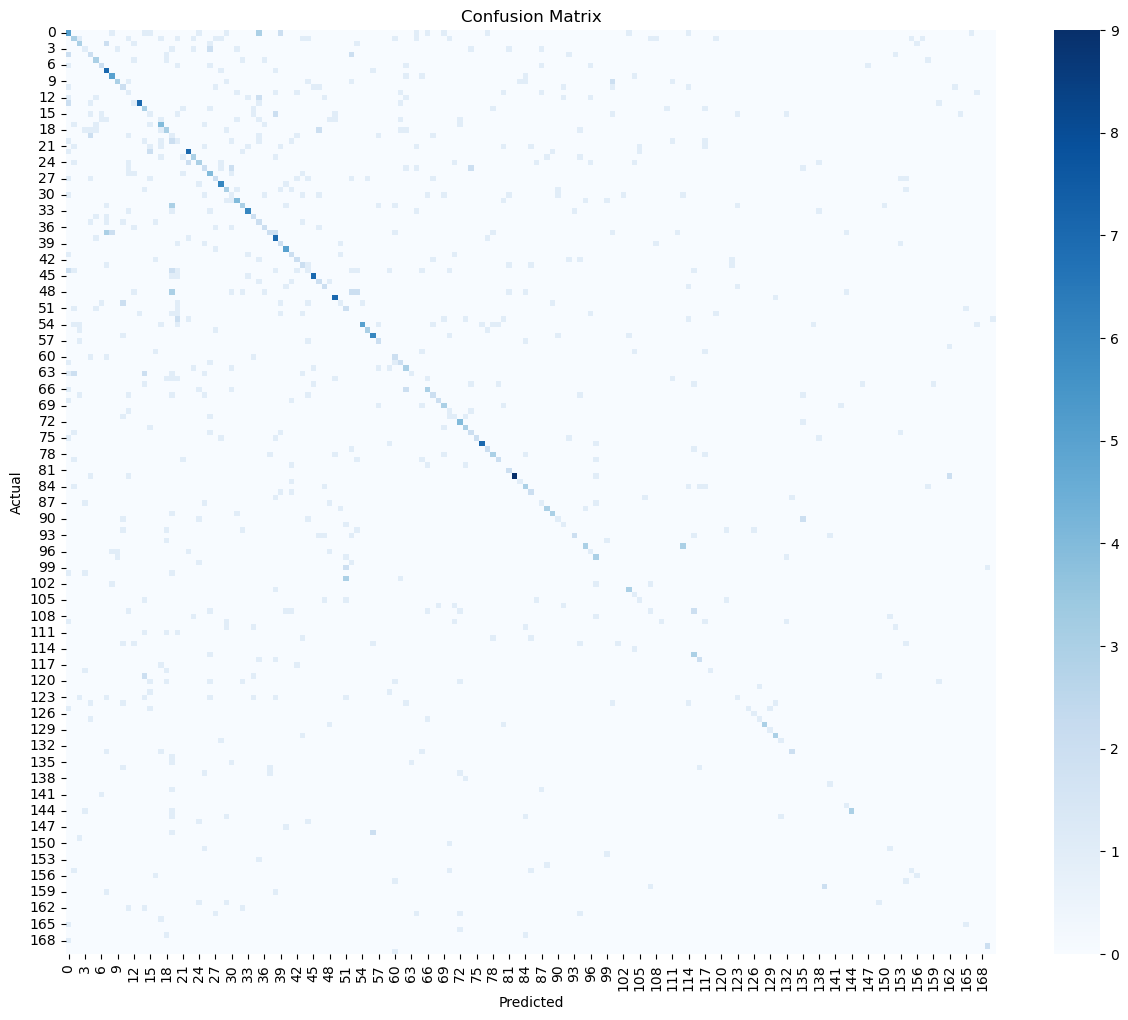

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix

# Plot it
plt.figure(figsize=(15, 12))  # Increase figure size
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
